# PPP Loan Data EDA 
---
### We'll be analyzing the PPP Loan data to understand the breakdown of what kind of companies took money from the government's COVID relief initiatives.  A few things to note with regards to this data:
* The SBA did not actually loan out this money.  Banks did, while the SBA guarantees the loans.
* The banks determine whether they want to loan the funds based on a good-faith certification provided by the borrower.  In other words, the Borrower has to go to the bank and say "I really need the money for my SMALL BUSINESS!"
* Not all loans are forgivable and just because a business is listed here doesn't mean the SBA endorses them or confirms that they met PPP requirements.
* This data is voluntarily reported by borrowers and most borrowers didn't provide much demographic information.  
* Long story short: SBA lets the banks make the call on who gets funds, and will only automatically review loans over \$2M.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

%matplotlib inline

sns.set(style = 'whitegrid')

In [2]:
data = pd.read_csv("All Data by State/All Data by State/150k plus/PPP Data 150k plus.csv")
data.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,04/15/2020,First National Bank Alaska,AK - 00
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,04/11/2020,KeyBank National Association,AK - 00
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,06/10/2020,CoBank ACB,AK - 00


In [3]:
naics = pd.read_excel('2017-NAICS-Descriptions.xlsx')
naics = naics.drop('Description',axis=1)
naics.head()

,Code,Title
0,11,"Agriculture, Forestry, Fishing and HuntingT"
1,111,Crop ProductionT
2,1111,Oilseed and Grain FarmingT
3,11111,Soybean FarmingT
4,111110,Soybean Farming


In [4]:
naics['Code'] = naics['Code'].astype(str).str.replace('-', '').astype(int)

In [5]:
naics['Code'].head()

0        11
1       111
2      1111
3     11111
4    111110
Name: Code, dtype: int32

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661218 entries, 0 to 661217
Data columns (total 16 columns):
LoanRange        661218 non-null object
BusinessName     661210 non-null object
Address          661201 non-null object
City             661203 non-null object
State            661218 non-null object
Zip              661202 non-null float64
NAICSCode        654435 non-null float64
BusinessType     659789 non-null object
RaceEthnicity    661218 non-null object
Gender           661218 non-null object
Veteran          661218 non-null object
NonProfit        42462 non-null object
JobsRetained     620712 non-null float64
DateApproved     661218 non-null object
Lender           661218 non-null object
CD               661218 non-null object
dtypes: float64(3), object(13)
memory usage: 80.7+ MB


Some things we could further dive into may include:
* What states had the most loans?
* What loan amount segments received the most approvals?
* Which bank made the most PPP loans?  By State?
* Most loans by business type.
* Which industries (by NAICS code) took the most PPP loans?  IMPORT NAICS CODE KEYS

In [7]:
data['DateApproved'] = pd.to_datetime(data['DateApproved'])

In [8]:
data['Zip'] = data['Zip'].fillna(0).astype(np.int64)

In [9]:
data['NAICSCode'] = data['NAICSCode'].fillna(0).astype(np.int64)

In [10]:
Month_Values = {
3:'Mar 2020',
4:'Apr 2020',
5:'May 2020',
6:'Jun 2020',
7:'Jul 2020',
8:'Aug 2020'
}

data['Month'] = pd.DatetimeIndex(data['DateApproved']).month
# data['Month'] = data['Month'].replace(Month_Values)

In [11]:
data_merged = pd.merge(left=data, right=naics, how='left', left_on='NAICSCode', right_on='Code')

In [12]:
data_merged.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Month,Code,Title
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,813920,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,2020-04-14,"National Cooperative Bank, National Association",AK - 00,4,813920.0,Professional Organizations
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645,238190,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,2020-04-15,First National Bank Alaska,AK - 00,4,238190.0,"Other Foundation, Structure, and Building Exte..."
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503,722310,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,2020-04-11,KeyBank National Association,AK - 00,4,722310.0,Food Service Contractors
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515,621111,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,2020-04-29,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00,4,621111.0,Offices of Physicians (except Mental Health Sp...
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645,517311,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,2020-06-10,CoBank ACB,AK - 00,6,517311.0,Wired Telecommunications Carriers


In [13]:
data_merged['LoanRange'].value_counts()

e $150,000-350,000      379054
d $350,000-1 million    199456
c $1-2 million           53030
b $2-5 million           24838
a $5-10 million           4840
Name: LoanRange, dtype: int64

In [14]:
data2 = data_merged.replace(['e $150,000-350,000', 'd $350,000-1 million', 'c $1-2 million', 'b $2-5 million','a $5-10 million'], ['150k - 350k','350k - 1M','$1 - 2M','$2 - 5M','$5 - 10M'])

In [15]:
data2['LoanRange'].value_counts()

150k - 350k    379054
350k - 1M      199456
$1 - 2M         53030
$2 - 5M         24838
$5 - 10M         4840
Name: LoanRange, dtype: int64

In [16]:
pivot = pd.DataFrame(data2.pivot_table(index='Month', columns='LoanRange', aggfunc='size', fill_value=0))
pivot2 = pivot.reindex(columns=['150k - 350k','350k - 1M','$1 - 2M','$2 - 5M','$5 - 10M'])
pivot2 = pivot2.reset_index(level=0)
pivot2

LoanRange,Month,150k - 350k,350k - 1M,$1 - 2M,$2 - 5M,$5 - 10M
0,4,304213,172663,47966,23060,4430
1,5,65651,23295,4336,1573,342
2,6,9190,3498,728,205,68


In [17]:
melted = pd.melt(pivot2, id_vars=['Month'], value_vars=['150k - 350k','350k - 1M','$1 - 2M','$2 - 5M','$5 - 10M'])
melted

,Month,LoanRange,value
0,4,150k - 350k,304213
1,5,150k - 350k,65651
2,6,150k - 350k,9190
3,4,350k - 1M,172663
4,5,350k - 1M,23295
5,6,350k - 1M,3498
6,4,$1 - 2M,47966
7,5,$1 - 2M,4336
8,6,$1 - 2M,728
9,4,$2 - 5M,23060


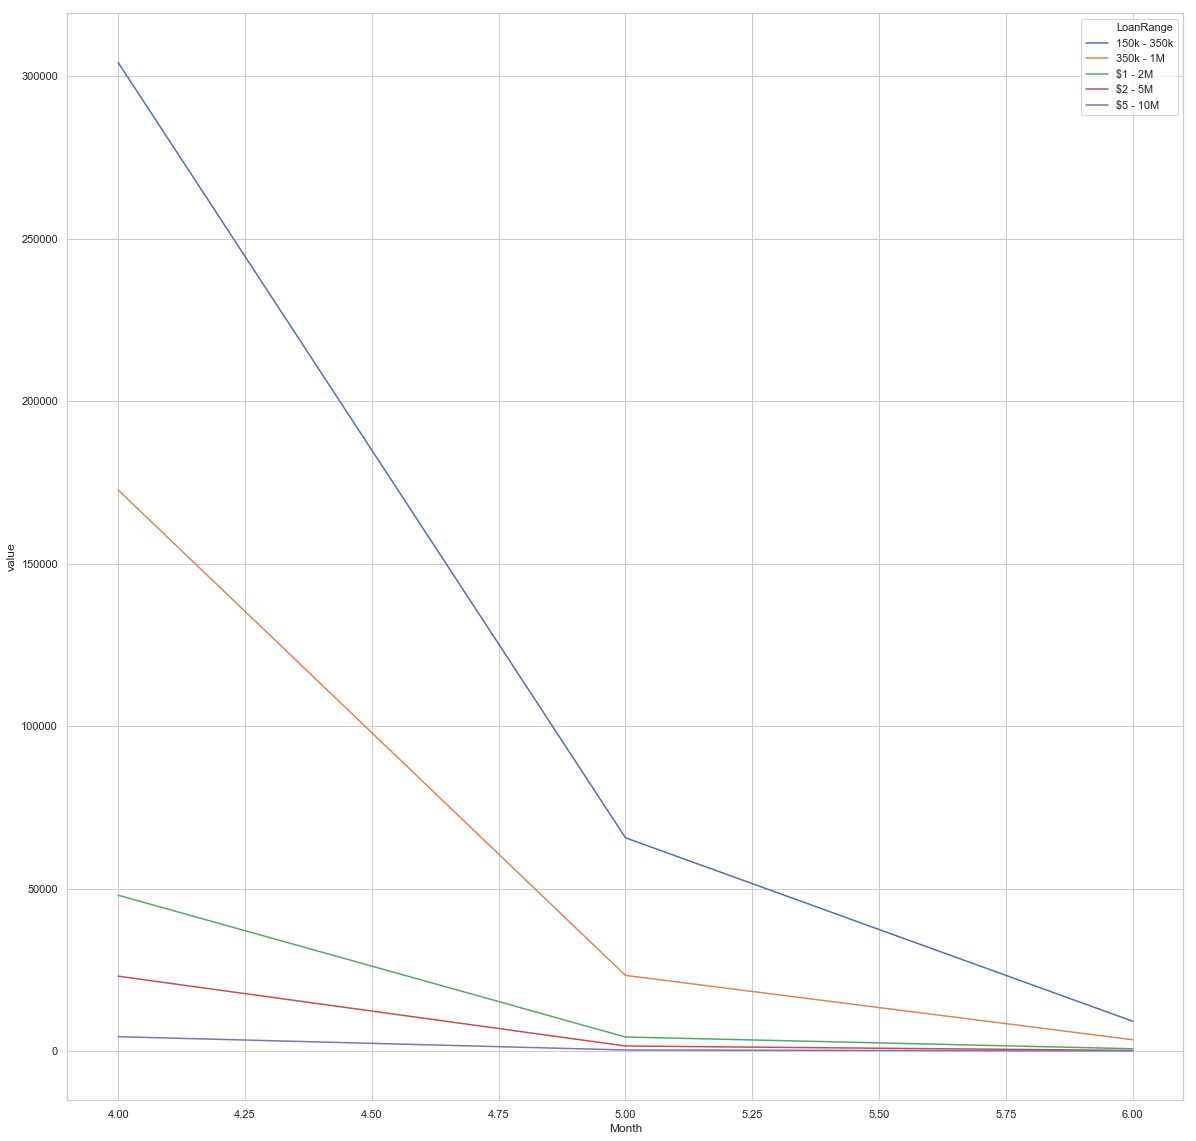

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
sns.lineplot(x="Month", y="value", hue="LoanRange", data=melted)

In [19]:
data2['State'].value_counts()

CA    87689
TX    52150
NY    46888
FL    42207
IL    27412
PA    26095
OH    22888
NJ    21858
MI    19971
GA    18291
MA    18252
NC    16324
VA    16178
WA    15849
MN    13719
CO    13385
MD    12919
WI    12355
IN    11853
MO    11459
AZ    11326
TN    11269
OR     9224
LA     9060
CT     8595
AL     7872
SC     7615
OK     6848
UT     6737
KY     6438
IA     5936
KS     5858
NV     5542
AR     4256
NE     4179
MS     3890
NH     3441
ID     3313
HI     3228
NM     3002
ME     2840
DC     2806
RI     2453
WV     2300
MT     2196
ND     2178
DE     2073
SD     1944
PR     1941
AK     1652
VT     1542
WY     1363
GU      296
VI      172
MP       56
AS       19
XX       16
Name: State, dtype: int64

In [20]:
data2[data2['State'] == 'XX']

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Month,Code,Title
661202,350k - 1M,AERO BOX LLC,NaN,NaN,XX,0,484210,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NA -,5,484210.0,Used Household and Office Goods Moving
661203,350k - 1M,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,XX,98112,0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,2020-05-03,"Bank of America, National Association",WA - 07,5,NaN,NaN
661204,350k - 1M,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,XX,92407,236115,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,2020-05-03,"Bank of America, National Association",CA - 08,5,236115.0,New Single-Family Housing Construction (except...
661205,350k - 1M,"PLEASANT PLACES, INC.",7684 Southrail Road,NORTH CHARLESTON,XX,29420,561730,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,2020-05-03,Synovus Bank,SC - 01,5,561730.0,Landscaping Services
661206,350k - 1M,"SUMTER COATINGS, INC.",2410 Highway 15 South,SUMTER,XX,29150,325510,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,2020-05-03,Synovus Bank,SC - 05,5,325510.0,Paint and Coating Manufacturing
661207,150k - 350k,CHURCH SQUARE PHARMACY INC,NaN,NaN,XX,0,424210,Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NA -,5,424210.0,Drugs and Druggists' Sundries Merchant Wholesa...
661208,150k - 350k,FERNANDINA BEACH HOTEL GROUP LLC,NaN,NaN,XX,0,721110,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NA -,5,721110.0,Hotels (except Casino Hotels) and Motels
661209,150k - 350k,FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC,501 State Road 13,SAINT JOHNS,XX,32259,813110,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,89.0,2020-05-03,Synovus Bank,FL - 04,5,813110.0,Religious Organizations
661210,150k - 350k,HUDSON EXTRUSIONS INC.,NaN,NaN,XX,0,326199,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NA -,5,326199.0,All Other Plastics Product Manufacturing
661211,150k - 350k,MIAMITOWN AUTO PARTS AND RECYCLING INC,NaN,NaN,XX,0,423140,Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,2020-05-03,The Huntington National Bank,NA -,5,423140.0,Motor Vehicle Parts (Used) Merchant Wholesalers


In [21]:
data3 = data2[data2['State'] != 'XX']
data3.shape

(661202, 19)

In [22]:
data3['LoanRange']

0            $5 - 10M
1            $5 - 10M
2            $5 - 10M
3            $5 - 10M
4            $5 - 10M
5            $5 - 10M
6            $5 - 10M
7            $5 - 10M
8            $5 - 10M
9            $5 - 10M
10           $5 - 10M
11           $5 - 10M
12            $2 - 5M
13            $2 - 5M
14            $2 - 5M
15            $2 - 5M
16            $2 - 5M
17            $2 - 5M
18            $2 - 5M
19            $2 - 5M
20            $2 - 5M
21            $2 - 5M
22            $2 - 5M
23            $2 - 5M
24            $2 - 5M
25            $2 - 5M
26            $2 - 5M
27            $2 - 5M
28            $2 - 5M
29            $2 - 5M
             ...     
661172    150k - 350k
661173    150k - 350k
661174    150k - 350k
661175    150k - 350k
661176    150k - 350k
661177    150k - 350k
661178    150k - 350k
661179    150k - 350k
661180    150k - 350k
661181    150k - 350k
661182    150k - 350k
661183    150k - 350k
661184    150k - 350k
661185    150k - 350k
661186    

In [23]:
state_counts = data3['State'].value_counts()
loans_by_state = state_counts.reset_index(level=0).rename(columns={'index': 'State', 'State': 'Loans'})

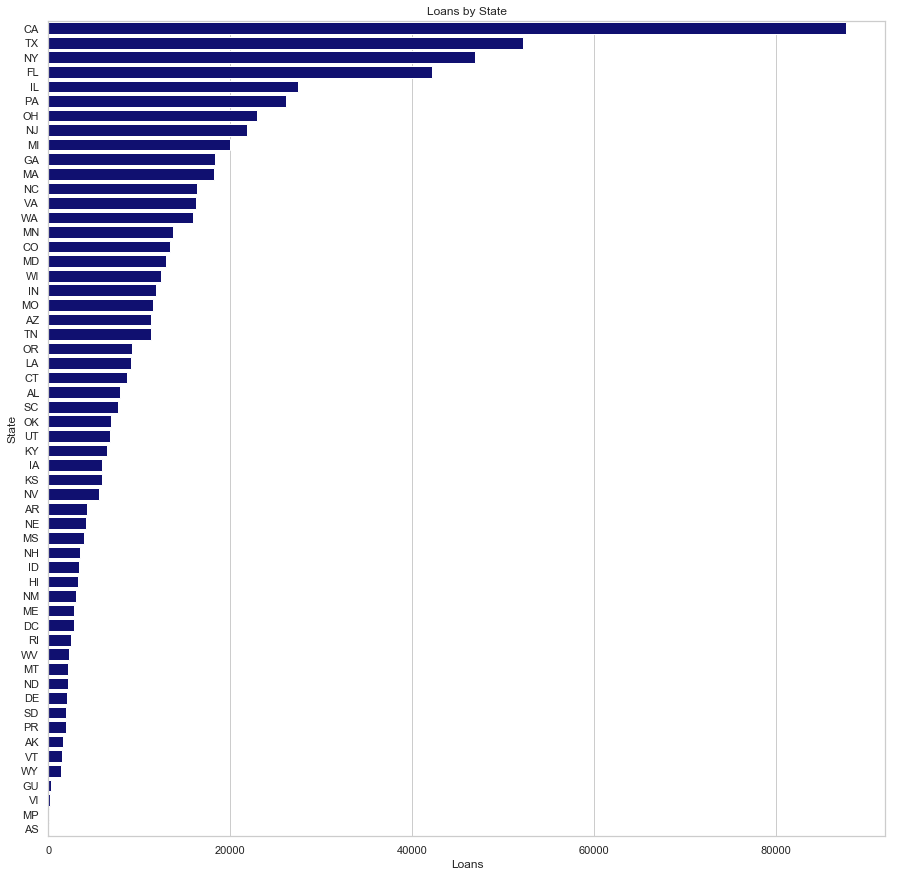

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Loans by State')
sns.barplot(x = 'Loans', y = 'State', data=loans_by_state, color='navy')

In [25]:
by_industry = data3['Title'].value_counts().head(50)
loans_by_industry = by_industry.reset_index(level=0).rename(columns={'index': 'Industry', 'Title': 'Loans'})
loans_by_industry

,Industry,Loans
0,Full-Service Restaurants,33608
1,Offices of Physicians (except Mental Health Sp...,20932
2,Offices of Lawyers,14310
3,"Plumbing, Heating, and Air-Conditioning Contra...",13140
4,New Car Dealers,12694
5,Commercial and Institutional Building Construc...,10942
6,Religious Organizations,10680
7,Offices of Dentists,10627
8,Limited-Service Restaurants,10207
9,Electrical Contractors and Other Wiring Instal...,9886


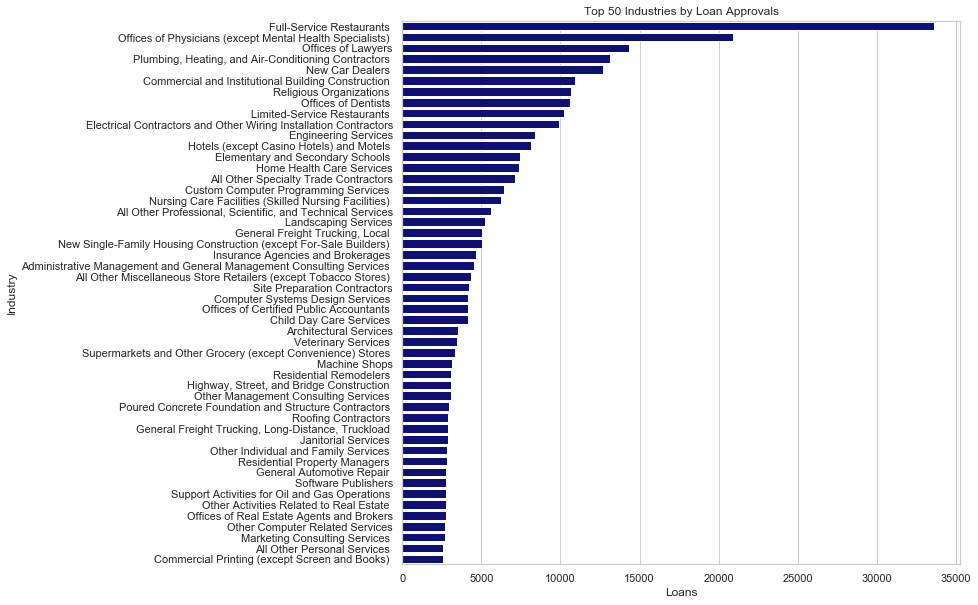

In [26]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Top 50 Industries by Loan Approvals')
sns.barplot(x = 'Loans', y = 'Industry', data = loans_by_industry, color='navy')

In [27]:
bank_counts = data3['Lender'].value_counts().head(25)
t25_loans_by_bank = bank_counts.reset_index(level=0).rename(columns={'index': 'Bank', 'Lender': 'Loans'})
t25_loans_by_bank

,Bank,Loans
0,"JPMorgan Chase Bank, National Association",36700
1,"Bank of America, National Association",29152
2,Truist Bank d/b/a Branch Banking & Trust Co,16076
3,"PNC Bank, National Association",14649
4,"Wells Fargo Bank, National Association",12147
5,"TD Bank, National Association",10389
6,KeyBank National Association,9352
7,"U.S. Bank, National Association",8658
8,"Zions Bank, A Division of",8418
9,Manufacturers and Traders Trust Company,8345


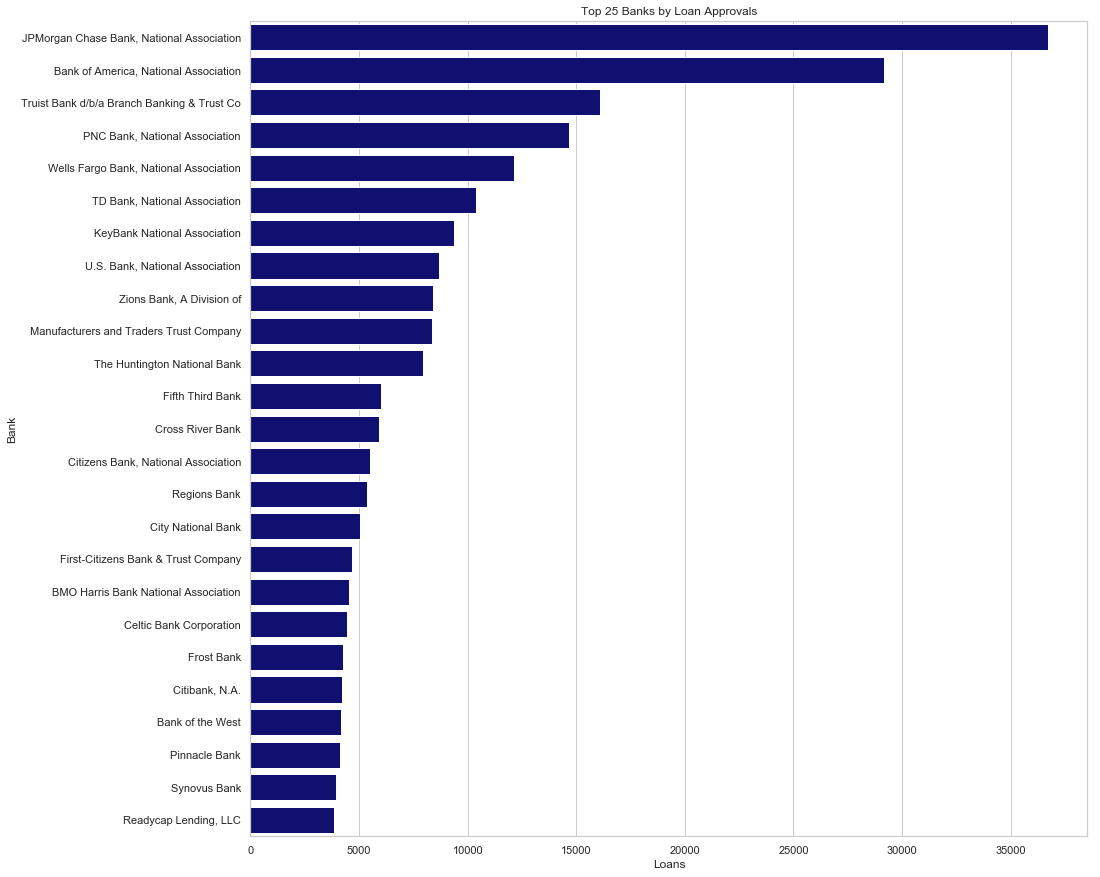

In [28]:
fig2, ax2 = plt.subplots(figsize=(15,15))
ax2.set_title('Top 25 Banks by Loan Approvals')
sns.barplot(x = 'Loans', y = 'Bank', data=t25_loans_by_bank, color='navy')

In [29]:
otown_loans = data3[(data3['State']=='FL') & (data3['City']=='ORLANDO')]
otown_loans[otown_loans['LoanRange'] == '$5 - 10M']

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Month,Code,Title
139674,$5 - 10M,AGMUS VENTURES INC.,5575 South Semoran Blvd Suite 505,ORLANDO,FL,32822,523910,NaN,Unanswered,Unanswered,Unanswered,NaN,177.0,2020-05-03,Fifth Third Bank,FL - 07,5,523910.0,Miscellaneous Intermediation
139681,$5 - 10M,"ASLAN INTERNATIONAL MINISTRY, INC.",5104 N Orange Blossom Trail # 115,ORLANDO,FL,32810,624229,Corporation,Unanswered,Unanswered,Unanswered,NaN,486.0,2020-04-07,First Home Bank,FL - 07,4,624229.0,Other Community Housing Services
139682,$5 - 10M,"ASPIRE HEALTH PARTNERS, INC.","5151 Adanson Street, Suite 200",ORLANDO,FL,32804,621420,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,NaN,2020-04-28,Seaside National Bank & Trust,FL - 07,4,621420.0,Outpatient Mental Health and Substance Abuse C...
139683,$5 - 10M,ASSISTRX INC.,4700 Millenia Blvd Suite 500,ORLANDO,FL,32839,511210,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,498.0,2020-04-10,Truist Bank d/b/a Branch Banking & Trust Co,FL - 10,4,511210.0,Software Publishers
139691,$5 - 10M,BERTUCCIS RESTAURANTS LLC,4700 MILLENIA BLVD STE 400,ORLANDO,FL,32839,722511,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,500.0,2020-04-08,"PNC Bank, National Association",FL - 10,4,722511.0,Full-Service Restaurants
139696,$5 - 10M,BRAVO BRIO RESTAURANTS LLC,4700 millenia blvd suite 400,ORLANDO,FL,32839,722511,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,500.0,2020-06-16,City National Bank of Florida,FL - 10,6,722511.0,Full-Service Restaurants
139716,$5 - 10M,"DRMP, INC.",941 Lake Baldwin Lane Suite 100,ORLANDO,FL,32814,541330,Corporation,Unanswered,Male Owned,Unanswered,NaN,NaN,2020-04-10,Seaside National Bank & Trust,FL - 07,4,541330.0,Engineering Services
139721,$5 - 10M,"EMERGENCY PHYSICIANS OF CENTRAL FLORIDA, LLP",3090 Caruso Court Ste 20,ORLANDO,FL,32806,621111,Partnership,Unanswered,Unanswered,Unanswered,NaN,241.0,2020-04-10,"Axiom Bank, National Association",FL - 07,4,621111.0,Offices of Physicians (except Mental Health Sp...
139725,$5 - 10M,ENTERTAINMENT TECHNOLOGY PARTNERS LLC,2350 Investors Row,ORLANDO,FL,32837,532490,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,NaN,2020-04-12,"PNC Bank, National Association",FL - 10,4,532490.0,Other Commercial and Industrial Machinery and ...
139730,$5 - 10M,"FOUNDRY COMMERCIAL, LLC","420 S. Orange Avenue, Suite 400",ORLANDO,FL,32801,531190,Limited Liability Company(LLC),Unanswered,Male Owned,Non-Veteran,NaN,350.0,2020-04-08,"Axiom Bank, National Association",FL - 07,4,531190.0,Lessors of Other Real Estate Property


In [30]:
pd.set_option('display.max_rows', None)
otown_loans[otown_loans['LoanRange'] == '$2 - 5M']

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Month,Code,Title
139876,$2 - 5M,A.B. CLOSING CORPORATION,12612 CHALLENGER PKWY Suite 200,ORLANDO,FL,32826,561311,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,286.0,2020-04-06,Fairwinds CU,FL - 07,4,561311.0,Employment Placement Agencies
139882,$2 - 5M,ACTION NISSAN INC,12801 S ORANGE BLOSSOM TRL,ORLANDO,FL,32837,441110,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,320.0,2020-04-07,Truist Bank d/b/a Branch Banking & Trust Co,FL - 10,4,441110.0,New Car Dealers
139896,$2 - 5M,"ADVANCED REFRIGERATION & AIR, INC","7617 NARCOOSSEE ROAD,",ORLANDO,FL,32822,811310,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,195.0,2020-04-13,Regions Bank,FL - 07,4,811310.0,Commercial and Industrial Machinery and Equipm...
139906,$2 - 5M,"AGPM, LLC",501 N Magnolia,ORLANDO,FL,32801,531311,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,211.0,2020-04-15,Valley National Bank,FL - 07,4,531311.0,Residential Property Managers
139925,$2 - 5M,AMERICAN RESIDENTIAL PRODUCTS INC,2401 Lynx Lane,ORLANDO,FL,32804,238310,Corporation,Unanswered,Unanswered,Unanswered,NaN,328.0,2020-04-16,Regions Bank,FL - 07,4,238310.0,Drywall and Insulation Contractors
139931,$2 - 5M,"AMTIS, INC",12124 High Tech Ave Suite 150,ORLANDO,FL,32817,541990,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,2020-05-21,Live Oak Banking Company,FL - 07,5,541990.0,"All Other Professional, Scientific, and Techni..."
139979,$2 - 5M,BBRG TR LLC,4705 S Apopka Vineland Rd Ste 210,ORLANDO,FL,32819,722110,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,334.0,2020-04-14,BBVA USA,FL - 10,4,NaN,NaN
139989,$2 - 5M,"BENTO GROUP MANAGEMENT, LP",151 S ORANGE AVE,ORLANDO,FL,32801,722513,Limited Liability Partnership,Unanswered,Male Owned,Non-Veteran,NaN,500.0,2020-04-15,BBVA USA,FL - 07,4,722513.0,Limited-Service Restaurants
140002,$2 - 5M,"BH ACQUISITION COMPANY, LLC",1620 East Buena Vista Dr.,ORLANDO,FL,32830,722511,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,421.0,2020-04-06,"Wintrust Bank, National Association",FL - 09,4,722511.0,Full-Service Restaurants
140009,$2 - 5M,BISHOP MOORE CATHOLIC HIGH SCHOOL INC,3901 EDGEWATER DR,ORLANDO,FL,32804,813110,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,257.0,2020-04-30,Citizens Bank and Trust,FL - 07,4,813110.0,Religious Organizations


In [37]:
otown_loans[otown_loans['BusinessName'].str.contains('KOBE')==True]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,Month,Code,Title
150071,350k - 1M,"KOBE ALAFAYA II, LLC",11609 East Colonial Drive,ORLANDO,FL,32817,722511,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,62.0,2020-04-27,Winter Park National Bank,FL - 07,4,722511.0,Full-Service Restaurants
150072,350k - 1M,"KOBE I-DRIVE, LLC",8148 International Drive,ORLANDO,FL,32819,722511,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,51.0,2020-04-27,Winter Park National Bank,FL - 10,4,722511.0,Full-Service Restaurants


In [32]:
test = pd.DataFrame(data2['LoanRange'].value_counts())

In [33]:
test.reset_index(level=0, inplace=True)

In [34]:
test

,index,LoanRange
0,150k - 350k,379054
1,350k - 1M,199456
2,$1 - 2M,53030
3,$2 - 5M,24838
4,$5 - 10M,4840


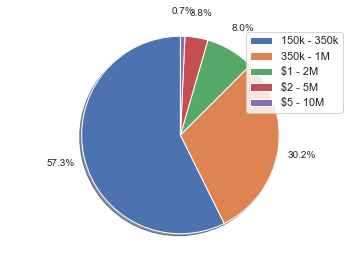

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = test['index']
sizes = test['LoanRange']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=1.25, labeldistance=1.)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=labels, loc= 1)

plt.show()